In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
# from sklearn.metrics import confusion_matrix , classification_report
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
tf.random.set_seed(1234)
import os
import random
from keras.layers import LeakyReLU

In [2]:
import seaborn as sns


In [3]:
os.environ['PYTHONHASHSEED']=str(42)
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [4]:
df=pd.read_excel("data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.2,566,4.3,NaN,NaN,NaN,NaN,NaN
1,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.5,566,10.0,NaN,NaN,NaN,NaN,NaN
2,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,1.0,566,17.5,NaN,NaN,NaN,NaN,NaN
3,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,3.0,566,31.0,NaN,NaN,NaN,NaN,NaN
4,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,7.0,566,34.0,NaN,NaN,NaN,NaN,NaN


In [5]:
data= df[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']]


In [6]:
data.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.2,566,4.3
1,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.5,566,10.0
2,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,1.0,566,17.5
3,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,3.0,566,31.0
4,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,7.0,566,34.0


In [7]:
X= data[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']]


In [8]:
X.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.2,566
1,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.5,566
2,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,1.0,566
3,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,3.0,566
4,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,7.0,566


In [9]:
Y= data['X11']


In [10]:
Y.head()

0     4.3
1    10.0
2    17.5
3    31.0
4    34.0
Name: X11, dtype: float64

In [11]:
#We check the number of unique values in each column
a=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']
for i in a:
    print(len(X[i].unique()))

18
17
17
8
18
17
9
14
55
52


In [12]:
# # plot the boxplot for each variable
# # subplots(): plot subplots
# # figsize(): set the figure size
# fig, ax = plt.subplots(2, 5, figsize=(15, 8))

# # plot the boxplot using boxplot() from seaborn
# # z: let the variable z define the boxplot
# # x: data for which the boxplot is to be plotted
# # orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# # whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# # ax: specifies the axes object to draw the plot o
# # set_xlabel(): set the x-axis label
# # fontsize: sets the font size of the x-axis label
# for variable, subplot in zip(X.columns, ax.flatten()):
#     z = sns.boxplot(x = X[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
#     z.set_xlabel(variable, fontsize = 20)  


In [13]:
# #this code reduces the  above outliers seen. This is done by chaning the values in the box plot based on inter quantile range 
# for i in X.columns:
#     q1=X[i].quantile(0.25)
#     q3=X[i].quantile(0.75)
#     iqr=q3-q1
#     ub=q3 + 1.5*iqr
#     lb=q1 - 1.5*iqr
#     uc=X[i].quantile(0.99)
#     lc=X[i].quantile(0.01)
#     for ind1 in X[i].index:
#         if X.loc[ind1, i] >ub:            
#             X.loc[ind1, i] =uc
#         if X.loc[ind1, i] < lb:
#             X.loc[ind1, i] =lc


In [14]:
# # plot the boxplot for each variable
# # subplots(): plot subplots
# # figsize(): set the figure size
# fig, ax = plt.subplots(2, 5, figsize=(15, 8))

# # plot the boxplot using boxplot() from seaborn
# # z: let the variable z define the boxplot
# # x: data for which the boxplot is to be plotted
# # orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# # whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# # ax: specifies the axes object to draw the plot o
# # set_xlabel(): set the x-axis label
# # fontsize: sets the font size of the x-axis label
# for variable, subplot in zip(X.columns, ax.flatten()):
#     z = sns.boxplot(x = X[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
#     z.set_xlabel(variable, fontsize = 20)  


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_std  = True ,with_mean = True, copy = True)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [19]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score


In [20]:
kf =KFold(n_splits=10, shuffle=True, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)
from sklearn.model_selection import cross_val_score
RF_accuracies = cross_val_score(estimator = rf, X = X, y = Y, cv = kf,scoring="r2")
print("Mean_RF_Acc : ", RF_accuracies.mean())


Mean_RF_Acc :  0.8073577453485754


# So i just tried a neural network below, it is similar to the neural network given in the machine learning mastery, not really sure what it means but have to work on that

In [22]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import tensorflow as tf


In [23]:
from tensorflow.keras.optimizers import SGD

In [24]:
# # DO NOT Modify this gives 74% accuracy
# reg_model = Sequential()
# a=reg_model.add(Dense(8, input_dim=10, activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
# # reg_model.add(Dense(4, activation='relu',kernel_regularizer='l2'))
# reg_model.add(Dropout(0.2))
# reg_model.add(Dense(1, activation='linear'))
# reg_model.compile(loss='mae', 
#                 optimizer='SGD')


# history = reg_model.fit(X_train_std, Y_train, 
#                             validation_data=(X_test_std, Y_test), 
#                             epochs=100, verbose=1)

# train_mse = reg_model.evaluate(X_train_std, Y_train, verbose=0)
# test_mse = reg_model.evaluate(X_test_std, Y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# # plot loss during training
# plt.title('Loss / Mean Squared Error')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()



In [25]:
# # DO NOT Modify this gives 74% accuracy
# reg_model = Sequential()
# a=reg_model.add(Dense(8, input_dim=10, activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
# # reg_model.add(Dense(4, activation='relu',kernel_regularizer='l2'))
# reg_model.add(Dropout(0.2))
# reg_model.add(Dense(1, activation='linear'))
# reg_model.compile(loss='mae', 
#                 optimizer='SGD')


# history = reg_model.fit(X_train_std, Y_train, 
#                             validation_data=(X_test_std, Y_test), 
#                             epochs=100, verbose=1)

# train_mse = reg_model.evaluate(X_train_std, Y_train, verbose=0)
# test_mse = reg_model.evaluate(X_test_std, Y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# # plot loss during training
# plt.title('Loss / Mean Squared Error')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()



In [26]:
# # DO NOT Modify this gives 74% accuracy
# reg_model = Sequential()
# a=reg_model.add(Dense(8, input_dim=10, activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
# # reg_model.add(Dense(4, activation='relu',kernel_regularizer='l2'))
# reg_model.add(Dropout(0.2))
# reg_model.add(Dense(1, activation='linear'))
# reg_model.compile(loss='mae', 
#                 optimizer='SGD')


# history = reg_model.fit(X_train_std, Y_train, 
#                             validation_data=(X_test_std, Y_test), 
#                             epochs=100, verbose=1)

# train_mse = reg_model.evaluate(X_train_std, Y_train, verbose=0)
# test_mse = reg_model.evaluate(X_test_std, Y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# # plot loss during training
# plt.title('Loss / Mean Squared Error')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()



In [27]:
opt = SGD(lr=0.01, momentum=0.9)
from sklearn.metrics import r2_score

Epoch 1/1300
6/6 [==============================] - 1s 56ms/step - loss: 10.6328 - val_loss: 13.2850
Epoch 2/1300
6/6 [==============================] - 0s 11ms/step - loss: 10.5754 - val_loss: 13.2348
Epoch 3/1300
6/6 [==============================] - 0s 13ms/step - loss: 10.5191 - val_loss: 13.1779
Epoch 4/1300
6/6 [==============================] - 0s 13ms/step - loss: 10.4526 - val_loss: 13.1132
Epoch 5/1300
6/6 [==============================] - 0s 11ms/step - loss: 10.3776 - val_loss: 13.0399
Epoch 6/1300
6/6 [==============================] - 0s 13ms/step - loss: 10.2939 - val_loss: 12.9565
Epoch 7/1300
6/6 [==============================] - 0s 13ms/step - loss: 10.2006 - val_loss: 12.8595
Epoch 8/1300
6/6 [==============================] - 0s 11ms/step - loss: 10.0910 - val_loss: 12.7511
Epoch 9/1300
6/6 [==============================] - 0s 13ms/step - loss: 9.9773 - val_loss: 12.6233
Epoch 10/1300
6/6 [==============================] - 0s 13ms/step - loss: 9.8441 - val_loss:

6/6 [==============================] - 0s 11ms/step - loss: 3.5496 - val_loss: 5.6635
Epoch 83/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.5392 - val_loss: 5.6800
Epoch 84/1300
6/6 [==============================] - 0s 10ms/step - loss: 3.5419 - val_loss: 5.6441
Epoch 85/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.5252 - val_loss: 5.6574
Epoch 86/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.5193 - val_loss: 5.6674
Epoch 87/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.5182 - val_loss: 5.6466
Epoch 88/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.5074 - val_loss: 5.6265
Epoch 89/1300
6/6 [==============================] - 0s 13ms/step - loss: 3.5100 - val_loss: 5.6434
Epoch 90/1300
6/6 [==============================] - 0s 13ms/step - loss: 3.5058 - val_loss: 5.6151
Epoch 91/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.4937 - val_loss: 5.5886
Epoch 92/1300


6/6 [==============================] - 0s 11ms/step - loss: 3.3143 - val_loss: 5.4156
Epoch 164/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.3101 - val_loss: 5.4129
Epoch 165/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.3085 - val_loss: 5.3872
Epoch 166/1300
6/6 [==============================] - 0s 13ms/step - loss: 3.3064 - val_loss: 5.4090
Epoch 167/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.3183 - val_loss: 5.4326
Epoch 168/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.3053 - val_loss: 5.3907
Epoch 169/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.3132 - val_loss: 5.3583
Epoch 170/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.3031 - val_loss: 5.3914
Epoch 171/1300
6/6 [==============================] - 0s 14ms/step - loss: 3.3118 - val_loss: 5.4086
Epoch 172/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.3072 - val_loss: 5.3865
Epoch

6/6 [==============================] - 0s 13ms/step - loss: 3.2091 - val_loss: 5.2494
Epoch 245/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.2080 - val_loss: 5.2210
Epoch 246/1300
6/6 [==============================] - 0s 14ms/step - loss: 3.2043 - val_loss: 5.2164
Epoch 247/1300
6/6 [==============================] - 0s 13ms/step - loss: 3.2057 - val_loss: 5.1967
Epoch 248/1300
6/6 [==============================] - 0s 13ms/step - loss: 3.2004 - val_loss: 5.2006
Epoch 249/1300
6/6 [==============================] - 0s 13ms/step - loss: 3.2216 - val_loss: 5.2555
Epoch 250/1300
6/6 [==============================] - 0s 12ms/step - loss: 3.2036 - val_loss: 5.1799
Epoch 251/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.2065 - val_loss: 5.2022
Epoch 252/1300
6/6 [==============================] - 0s 13ms/step - loss: 3.1977 - val_loss: 5.1753
Epoch 253/1300
6/6 [==============================] - 0s 13ms/step - loss: 3.2006 - val_loss: 5.1885
Epoch

6/6 [==============================] - 0s 14ms/step - loss: 3.1078 - val_loss: 5.0208
Epoch 326/1300
6/6 [==============================] - 0s 13ms/step - loss: 3.1016 - val_loss: 5.0223
Epoch 327/1300
6/6 [==============================] - 0s 13ms/step - loss: 3.0967 - val_loss: 5.0117
Epoch 328/1300
6/6 [==============================] - 0s 13ms/step - loss: 3.0986 - val_loss: 5.0427
Epoch 329/1300
6/6 [==============================] - 0s 14ms/step - loss: 3.0961 - val_loss: 5.0458
Epoch 330/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.0886 - val_loss: 5.0258
Epoch 331/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.0944 - val_loss: 4.9932
Epoch 332/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.0931 - val_loss: 5.0333
Epoch 333/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.0988 - val_loss: 5.0392
Epoch 334/1300
6/6 [==============================] - 0s 11ms/step - loss: 3.0921 - val_loss: 5.0152
Epoch

6/6 [==============================] - 0s 13ms/step - loss: 2.9874 - val_loss: 4.7957
Epoch 407/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.9751 - val_loss: 4.8230
Epoch 408/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.9810 - val_loss: 4.8010
Epoch 409/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.9717 - val_loss: 4.8361
Epoch 410/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.9831 - val_loss: 4.7872
Epoch 411/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.9684 - val_loss: 4.7954
Epoch 412/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.9910 - val_loss: 4.7868
Epoch 413/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.9694 - val_loss: 4.8144
Epoch 414/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.9761 - val_loss: 4.7851
Epoch 415/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.9772 - val_loss: 4.7828
Epoch

6/6 [==============================] - 0s 13ms/step - loss: 2.8333 - val_loss: 4.4834
Epoch 488/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.8281 - val_loss: 4.4921
Epoch 489/1300
6/6 [==============================] - 0s 14ms/step - loss: 2.8252 - val_loss: 4.4717
Epoch 490/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.8259 - val_loss: 4.4884
Epoch 491/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.8288 - val_loss: 4.4640
Epoch 492/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.8255 - val_loss: 4.4855
Epoch 493/1300
6/6 [==============================] - 0s 18ms/step - loss: 2.8210 - val_loss: 4.4548
Epoch 494/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.8219 - val_loss: 4.4432
Epoch 495/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.8142 - val_loss: 4.4491
Epoch 496/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.8157 - val_loss: 4.4947
Epoch

6/6 [==============================] - 0s 10ms/step - loss: 2.6918 - val_loss: 4.2319
Epoch 569/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.6939 - val_loss: 4.2193
Epoch 570/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.6964 - val_loss: 4.2570
Epoch 571/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.6888 - val_loss: 4.2119
Epoch 572/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.6839 - val_loss: 4.2357
Epoch 573/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.6981 - val_loss: 4.2221
Epoch 574/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.6757 - val_loss: 4.2790
Epoch 575/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.6987 - val_loss: 4.2227
Epoch 576/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.6728 - val_loss: 4.2100
Epoch 577/1300
6/6 [==============================] - 0s 14ms/step - loss: 2.6771 - val_loss: 4.1984
Epoch

6/6 [==============================] - 0s 10ms/step - loss: 2.5585 - val_loss: 4.1201
Epoch 650/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.5607 - val_loss: 4.0583
Epoch 651/1300
6/6 [==============================] - 0s 10ms/step - loss: 2.5555 - val_loss: 4.0944
Epoch 652/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.5747 - val_loss: 4.1041
Epoch 653/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.5596 - val_loss: 4.0289
Epoch 654/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.5569 - val_loss: 4.0627
Epoch 655/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.5544 - val_loss: 4.0399
Epoch 656/1300
6/6 [==============================] - 0s 10ms/step - loss: 2.5623 - val_loss: 4.0748
Epoch 657/1300
6/6 [==============================] - 0s 16ms/step - loss: 2.5528 - val_loss: 4.0440
Epoch 658/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.5617 - val_loss: 4.0241
Epoch

6/6 [==============================] - 0s 11ms/step - loss: 2.4647 - val_loss: 4.0084
Epoch 731/1300
6/6 [==============================] - 0s 10ms/step - loss: 2.4871 - val_loss: 3.9809
Epoch 732/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.4820 - val_loss: 4.0236
Epoch 733/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.4562 - val_loss: 4.0074
Epoch 734/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.4466 - val_loss: 3.9803
Epoch 735/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.4519 - val_loss: 3.9315
Epoch 736/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.4552 - val_loss: 4.0111
Epoch 737/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.4626 - val_loss: 3.9913
Epoch 738/1300
6/6 [==============================] - 0s 10ms/step - loss: 2.4530 - val_loss: 3.9837
Epoch 739/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.4436 - val_loss: 3.9633
Epoch

6/6 [==============================] - 0s 11ms/step - loss: 2.3791 - val_loss: 3.9117
Epoch 812/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.3945 - val_loss: 3.8559
Epoch 813/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.4016 - val_loss: 3.8866
Epoch 814/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.4069 - val_loss: 3.8783
Epoch 815/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.4047 - val_loss: 3.8489
Epoch 816/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.3786 - val_loss: 3.8790
Epoch 817/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.3691 - val_loss: 3.8668
Epoch 818/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.3667 - val_loss: 3.8807
Epoch 819/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.3611 - val_loss: 3.8516
Epoch 820/1300
6/6 [==============================] - 0s 10ms/step - loss: 2.3542 - val_loss: 3.8637
Epoch

6/6 [==============================] - 0s 11ms/step - loss: 2.3172 - val_loss: 3.7700
Epoch 893/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.2887 - val_loss: 3.7652
Epoch 894/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.2969 - val_loss: 3.7785
Epoch 895/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.3017 - val_loss: 3.7923
Epoch 896/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.3043 - val_loss: 3.8016
Epoch 897/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.3166 - val_loss: 3.7443
Epoch 898/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.2950 - val_loss: 3.8847
Epoch 899/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.3442 - val_loss: 3.8481
Epoch 900/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.3212 - val_loss: 3.7812
Epoch 901/1300
6/6 [==============================] - 0s 10ms/step - loss: 2.3064 - val_loss: 3.8332
Epoch

6/6 [==============================] - 0s 11ms/step - loss: 2.2147 - val_loss: 3.6501
Epoch 974/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.2131 - val_loss: 3.6896
Epoch 975/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.2013 - val_loss: 3.6537
Epoch 976/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.2076 - val_loss: 3.6882
Epoch 977/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.1772 - val_loss: 3.6667
Epoch 978/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.2044 - val_loss: 3.6638
Epoch 979/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.2150 - val_loss: 3.6351
Epoch 980/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.1870 - val_loss: 3.6762
Epoch 981/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.1871 - val_loss: 3.6373
Epoch 982/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.1876 - val_loss: 3.6643
Epoch

6/6 [==============================] - 0s 11ms/step - loss: 2.1223 - val_loss: 3.5091
Epoch 1054/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.1020 - val_loss: 3.5832
Epoch 1055/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.0984 - val_loss: 3.5872
Epoch 1056/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.1345 - val_loss: 3.5537
Epoch 1057/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.1417 - val_loss: 3.6255
Epoch 1058/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.1879 - val_loss: 3.5599
Epoch 1059/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.1303 - val_loss: 3.5897
Epoch 1060/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.1386 - val_loss: 3.6020
Epoch 1061/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.1089 - val_loss: 3.5501
Epoch 1062/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.1231 - val_loss: 3.5

6/6 [==============================] - 0s 11ms/step - loss: 2.0436 - val_loss: 3.5004
Epoch 1134/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.0462 - val_loss: 3.5219
Epoch 1135/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.0463 - val_loss: 3.4524
Epoch 1136/1300
6/6 [==============================] - 0s 10ms/step - loss: 2.0377 - val_loss: 3.4807
Epoch 1137/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.0558 - val_loss: 3.4532
Epoch 1138/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.0530 - val_loss: 3.5141
Epoch 1139/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.0765 - val_loss: 3.4582
Epoch 1140/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.0416 - val_loss: 3.5197
Epoch 1141/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.0538 - val_loss: 3.4695
Epoch 1142/1300
6/6 [==============================] - 0s 10ms/step - loss: 2.0319 - val_loss: 3.4

6/6 [==============================] - 0s 11ms/step - loss: 2.0070 - val_loss: 3.4408
Epoch 1214/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.0327 - val_loss: 3.5054
Epoch 1215/1300
6/6 [==============================] - 0s 10ms/step - loss: 2.0279 - val_loss: 3.4328
Epoch 1216/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.0440 - val_loss: 3.4163
Epoch 1217/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.0180 - val_loss: 3.4472
Epoch 1218/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.0079 - val_loss: 3.4327
Epoch 1219/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.0172 - val_loss: 3.4756
Epoch 1220/1300
6/6 [==============================] - 0s 11ms/step - loss: 1.9957 - val_loss: 3.3897
Epoch 1221/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.0131 - val_loss: 3.4261
Epoch 1222/1300
6/6 [==============================] - 0s 10ms/step - loss: 2.0010 - val_loss: 3.4

6/6 [==============================] - 0s 11ms/step - loss: 1.9722 - val_loss: 3.3796
Epoch 1294/1300
6/6 [==============================] - 0s 11ms/step - loss: 1.9919 - val_loss: 3.4187
Epoch 1295/1300
6/6 [==============================] - 0s 11ms/step - loss: 1.9940 - val_loss: 3.4089
Epoch 1296/1300
6/6 [==============================] - 0s 11ms/step - loss: 1.9782 - val_loss: 3.4594
Epoch 1297/1300
6/6 [==============================] - 0s 11ms/step - loss: 1.9686 - val_loss: 3.3980
Epoch 1298/1300
6/6 [==============================] - 0s 13ms/step - loss: 2.0197 - val_loss: 3.3623
Epoch 1299/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.0040 - val_loss: 3.4517
Epoch 1300/1300
6/6 [==============================] - 0s 11ms/step - loss: 2.0121 - val_loss: 3.4688
Train: 1.992, Test: 3.469


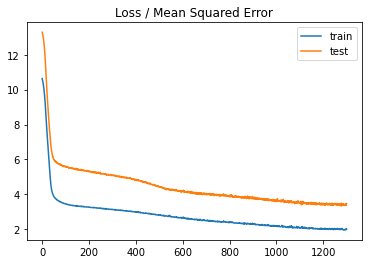

In [37]:
# # DO NOT Modify this gives 74% accuracy- LOL just kidding
# reg_model = Sequential()
# a=reg_model.add(Dense(8, input_dim=10, activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
# # reg_model.add(Dense(4, activation='relu',kernel_regularizer='l2'))
# reg_model.add(Dropout(0.2))
# reg_model.add(Dense(1, activation='linear'))
# reg_model.compile(loss='mae', 
#                 optimizer='SGD')


# history = reg_model.fit(X_train_std, Y_train, 
#                             validation_data=(X_test_std, Y_test), 
#                             epochs=100, verbose=1)

# train_mse = reg_model.evaluate(X_train_std, Y_train, verbose=0)
# test_mse = reg_model.evaluate(X_test_std, Y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# # plot loss during training
# plt.title('Loss / Mean Squared Error')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()
# # DO NOT Modify this gives 70%- actually
reg_model = Sequential()
a=reg_model.add(Dense(64, input_dim=10, activation=LeakyReLU()))
reg_model.add(Dense(16, activation='relu'))
# reg_model.add(Dropout(0.05))
reg_model.add(Dense(8, activation='relu'))
reg_model.compile(loss='mae', 
                optimizer='adam')


history = reg_model.fit(X_train_std, Y_train, 
                            validation_data=(X_test_std, Y_test), 
                            epochs=1300, verbose=1)
y_pred=reg_model.predict(X_test_std)
train_mse = reg_model.evaluate(X_train_std, Y_train, verbose=0)
test_mse = reg_model.evaluate(X_test_std, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()




In [39]:
r2_score(Y_test,y_pred)

ValueError: y_true and y_pred have different number of output (1!=8)

In [32]:
n= len(X_train_std)
p = len(X.columns)
adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
adj_R2**0.5

NameError: name 'R2' is not defined

# Principal Component Analysis

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)


In [25]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [26]:
#principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X)

In [27]:
X_pca.shape

(219, 8)

In [28]:
PCA_df = pd.DataFrame(data = X_pca)
PCA_df.head()

,0,1,2,3,4,5,6,7
0,-0.644530,0.561085,-0.056426,-0.053508,0.150036,-0.029116,-0.121246,-0.029008
1,-0.644541,0.561058,-0.056457,-0.053537,0.150010,-0.029114,-0.121294,-0.028705
2,-0.644560,0.561013,-0.056509,-0.053584,0.149968,-0.029109,-0.121374,-0.028199
3,-0.644633,0.560831,-0.056718,-0.053774,0.149797,-0.029090,-0.121694,-0.026176
4,-0.644781,0.560468,-0.057136,-0.054154,0.149455,-0.029052,-0.122335,-0.022130


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(PCA_df, Y, test_size=0.20, random_state=101)

In [30]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

Epoch 1/100
6/6 [==============================] - 1s 76ms/step - loss: 10.6909 - val_loss: 13.0211
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 10.0487 - val_loss: 12.3067
Epoch 3/100
6/6 [==============================] - 0s 37ms/step - loss: 9.4162 - val_loss: 11.2143
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 8.7739 - val_loss: 10.1725
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 8.2643 - val_loss: 9.6266
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 8.3833 - val_loss: 9.5530
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 8.4557 - val_loss: 9.7147
Epoch 8/100
6/6 [==============================] - 0s 12ms/step - loss: 8.0063 - val_loss: 9.8810
Epoch 9/100
6/6 [==============================] - 0s 13ms/step - loss: 8.4949 - val_loss: 9.7215
Epoch 10/100
6/6 [==============================] - 0s 11ms/step - loss: 7.5955 - val_loss: 9.3110
Epoch 11/100


Epoch 84/100
6/6 [==============================] - 0s 12ms/step - loss: 5.0784 - val_loss: 6.3855
Epoch 85/100
6/6 [==============================] - 0s 11ms/step - loss: 5.0780 - val_loss: 6.5954
Epoch 86/100
6/6 [==============================] - 0s 11ms/step - loss: 5.1259 - val_loss: 6.8859
Epoch 87/100
6/6 [==============================] - 0s 12ms/step - loss: 5.5791 - val_loss: 6.7462
Epoch 88/100
6/6 [==============================] - 0s 12ms/step - loss: 5.5056 - val_loss: 6.5011
Epoch 89/100
6/6 [==============================] - 0s 12ms/step - loss: 5.7310 - val_loss: 7.2169
Epoch 90/100
6/6 [==============================] - 0s 11ms/step - loss: 5.6806 - val_loss: 6.5930
Epoch 91/100
6/6 [==============================] - 0s 11ms/step - loss: 5.4190 - val_loss: 6.7183
Epoch 92/100
6/6 [==============================] - 0s 12ms/step - loss: 5.6605 - val_loss: 6.7766
Epoch 93/100
6/6 [==============================] - 0s 12ms/step - loss: 5.2289 - val_loss: 6.6259
Epoch 94/1

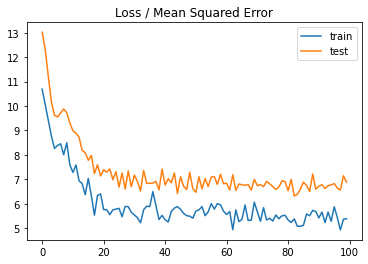

In [71]:
reg_model = Sequential()
a=reg_model.add(Dense(6, input_dim=8, activation=LeakyReLU(),kernel_initializer='he_uniform',kernel_regularizer='l2'))
reg_model.add(Dense(3, activation=LeakyReLU(),kernel_regularizer='l2'))
reg_model.add(Dropout(0.2))
reg_model.add(Dense(1, activation='linear',kernel_regularizer='l2'))
reg_model.compile(loss='mae', 
                optimizer=opt)


history = reg_model.fit(X_train, Y_train, 
                            validation_data=(X_test, Y_test), 
                            epochs=100, verbose=1)
y_pred=reg_model.predict(X_test)
train_mse = reg_model.evaluate(X_train, Y_train, verbose=0)
test_mse = reg_model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [72]:
R2=r2_score(Y_test,y_pred)

In [73]:
n= len(X_train)
p = len(X[1])
adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
adj_R2**0.5

0.45984030493851574

# AutoEncoder - standard scaler

In [74]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler(with_std  = True ,with_mean = True, copy = True)
# X = sc.fit_transform(X)


In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [84]:
from keras.layers import Input, Dense
from keras.models import Model

input_layer = Input(shape=(X.shape[1],))
encoded = Dense(5, activation='relu')(input_layer)
decoded = Dense(X.shape[1], activation='relu')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='sgd', loss='mse')

X1, X2, Y1, Y2 = train_test_split(X, X, test_size=0.3, random_state=101)

autoencoder.fit(X1, Y1,
                epochs=100,
                shuffle=True,
                verbose = 1,
                validation_data=(X2, Y2))

encoder = Model(input_layer, encoded)
X_ae = autoencoder.predict(X)


Epoch 1/100
5/5 [==============================] - 1s 65ms/step - loss: 0.1822 - val_loss: 0.1735
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 0.1807 - val_loss: 0.1722
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1793 - val_loss: 0.1709
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 0.1780 - val_loss: 0.1697
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 0.1767 - val_loss: 0.1685
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1754 - val_loss: 0.1673
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 0.1741 - val_loss: 0.1662
Epoch 8/100
5/5 [==============================] - 0s 20ms/step - loss: 0.1729 - val_loss: 0.1650
Epoch 9/100
5/5 [==============================] - 0s 17ms/step - loss: 0.1716 - val_loss: 0.1639
Epoch 10/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1704 - val_loss: 0.1627
Epoch 11/100
5/5 [=

Epoch 84/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1322 - val_loss: 0.1253
Epoch 85/100
5/5 [==============================] - 0s 14ms/step - loss: 0.1321 - val_loss: 0.1252
Epoch 86/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1319 - val_loss: 0.1251
Epoch 87/100
5/5 [==============================] - 0s 14ms/step - loss: 0.1318 - val_loss: 0.1249
Epoch 88/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1317 - val_loss: 0.1248
Epoch 89/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1315 - val_loss: 0.1247
Epoch 90/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1314 - val_loss: 0.1245
Epoch 91/100
5/5 [==============================] - 0s 16ms/step - loss: 0.1313 - val_loss: 0.1244
Epoch 92/100
5/5 [==============================] - 0s 16ms/step - loss: 0.1312 - val_loss: 0.1243
Epoch 93/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1311 - val_loss: 0.1242
Epoch 94/1

In [85]:
X_ae.shape

(219, 10)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_ae, Y, test_size=0.20, random_state=101)

Epoch 1/100
6/6 [==============================] - 1s 65ms/step - loss: 10.8166 - val_loss: 13.4875
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 10.7882 - val_loss: 13.3525
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 10.5842 - val_loss: 13.1071
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 10.2828 - val_loss: 12.8432
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 9.9651 - val_loss: 12.5598
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 9.6803 - val_loss: 12.2813
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 9.4431 - val_loss: 12.0159
Epoch 8/100
6/6 [==============================] - 0s 11ms/step - loss: 9.2638 - val_loss: 11.7403
Epoch 9/100
6/6 [==============================] - 0s 11ms/step - loss: 9.0983 - val_loss: 11.4425
Epoch 10/100
6/6 [==============================] - 0s 11ms/step - loss: 8.9116 - val_loss: 11.1530
Epoch

6/6 [==============================] - 0s 12ms/step - loss: 7.7042 - val_loss: 9.7784
Epoch 84/100
6/6 [==============================] - 0s 12ms/step - loss: 7.6560 - val_loss: 9.3018
Epoch 85/100
6/6 [==============================] - 0s 13ms/step - loss: 7.6006 - val_loss: 9.3167
Epoch 86/100
6/6 [==============================] - 0s 12ms/step - loss: 7.8951 - val_loss: 9.4552
Epoch 87/100
6/6 [==============================] - 0s 11ms/step - loss: 7.4615 - val_loss: 9.1452
Epoch 88/100
6/6 [==============================] - 0s 11ms/step - loss: 7.8502 - val_loss: 9.2413
Epoch 89/100
6/6 [==============================] - 0s 12ms/step - loss: 7.3274 - val_loss: 8.9869
Epoch 90/100
6/6 [==============================] - 0s 13ms/step - loss: 7.4917 - val_loss: 9.5533
Epoch 91/100
6/6 [==============================] - 0s 12ms/step - loss: 7.1799 - val_loss: 9.0268
Epoch 92/100
6/6 [==============================] - 0s 15ms/step - loss: 8.3275 - val_loss: 8.9560
Epoch 93/100
6/6 [=====

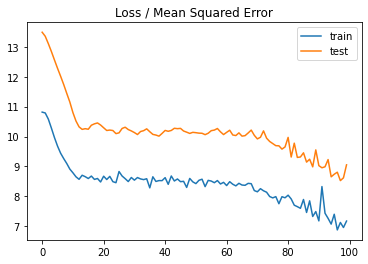

In [106]:
reg_model = Sequential()
reg_model.add(Dense(6, input_dim=10, activation=LeakyReLU(),kernel_initializer='normal',kernel_regularizer='l2'))
reg_model.add(Dense(3, activation=LeakyReLU(),kernel_regularizer='l2'))
reg_model.add(Dropout(0.2))
reg_model.add(Dense(1, activation='relu',kernel_regularizer='l2'))
reg_model.compile(loss='mae', 
                optimizer=opt)


history = reg_model.fit(X_train, Y_train, 
                            validation_data=(X_test, Y_test), 
                            epochs=100, verbose=1)
y_pred=reg_model.predict(X_test)
train_mse = reg_model.evaluate(X_train, Y_train, verbose=0)
test_mse = reg_model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()



In [107]:
R2=r2_score(Y_test,y_pred)

In [108]:
n= len(X_train)
p = len(X[1])
adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
adj_R2

-0.1690856401389571

# Stacked AutoEncoder

In [226]:
from keras import regularizers
batch_size = 32
input_dim = X_train[0].shape[0] #num of predictor variables 
learning_rate = 1e-4
input_layer = Input(shape=(input_dim, ), name="input")
#Input Layer
encoder = Dense (100, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
#Encoder’s first dense layer
encoder = Dense (50, activation="relu",
activity_regularizer=regularizers.l1(learning_rate))(encoder)
#Encoder’s second dense layer
encoder = Dense (25, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(encoder)
# Code layer
encoder = Dense (8, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(encoder)
# Decoder’s first dense layer
decoder = Dense(25, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(encoder)
# Decoder’s second dense layer
decoder = Dense(50, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(decoder)
# Decoder’s Third dense layer
decoder = Dense(100, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(decoder)
# Output Layer
decoder = Dense(input_dim, activation="sigmoid", activity_regularizer=regularizers.l1(learning_rate))(decoder)

In [227]:
autoencoder_1 = Model(inputs=input_layer, outputs=decoder)
autoencoder_1.compile(metrics=['accuracy'],loss='mean_squared_error',optimizer='adam')
satck_1 = autoencoder_1.fit(X_train, X_train,epochs=200,batch_size=batch_size)


Epoch 1/200
6/6 [==============================] - 1s 2ms/step - loss: 1.2595 - accuracy: 0.1257
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 1.2302 - accuracy: 0.2286
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 1.1804 - accuracy: 0.2286
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 1.1124 - accuracy: 0.2286
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 1.0687 - accuracy: 0.2286
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 1.0378 - accuracy: 0.2286
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9987 - accuracy: 0.2457
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 0.9568 - accuracy: 0.2686
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.9226 - accuracy: 0.2971
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8977 - accuracy: 0.3657
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 0.7039 - accuracy: 0.5429
Epoch 168/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7040 - accuracy: 0.5600
Epoch 169/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7038 - accuracy: 0.5486
Epoch 170/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7038 - accuracy: 0.5429
Epoch 171/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5657
Epoch 172/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5886
Epoch 173/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.5486
Epoch 174/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7036 - accuracy: 0.5543
Epoch 175/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5429
Epoch 176/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.5543
Epoch 177/200
6/6 [=====

In [229]:
autoencoder_2_input = autoencoder_1.predict(X_train)
autoencoder_2_input = np.concatenate((autoencoder_2_input , X_train))


In [230]:
autoencoder_2 = Model(inputs=input_layer, outputs=decoder)
autoencoder_2.compile(metrics=['accuracy'],loss='mean_squared_error',optimizer='adam')
satck_2 = autoencoder_2.fit(autoencoder_2_input, autoencoder_2_input,epochs=100,batch_size=batch_size)


Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 0.3602 - accuracy: 0.6371
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.7514
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.6686
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.7000
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3545 - accuracy: 0.7200
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.7314
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.7057
Epoch 8/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3539 - accuracy: 0.7429
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.7486
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.7371
Epoch 11/

11/11 [==============================] - 0s 1ms/step - loss: 0.3513 - accuracy: 0.7514
Epoch 84/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.7600
Epoch 85/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.7486
Epoch 86/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 0.7629
Epoch 87/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3511 - accuracy: 0.7429
Epoch 88/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3510 - accuracy: 0.7600
Epoch 89/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3511 - accuracy: 0.7657
Epoch 90/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.7571
Epoch 91/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3511 - accuracy: 0.7629
Epoch 92/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3511 - accuracy: 0.7486
Epoch 93/100


In [231]:
autoencoder_3_input = autoencoder_2.predict(autoencoder_2_input)
autoencoder_3_input = np.concatenate((autoencoder_3_input, autoencoder_2_input))


In [232]:
autoencoder_3 = Model(inputs=input_layer, outputs=decoder)
autoencoder_3.compile(metrics=['accuracy'], loss='mean_squared_error', optimizer='adam')
satck_3 = autoencoder_3.fit(autoencoder_3_input, autoencoder_3_input, epochs=50, batch_size=16)

Epoch 1/50
44/44 [==============================] - 1s 1ms/step - loss: 0.1772 - accuracy: 0.8429
Epoch 2/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1771 - accuracy: 0.8486
Epoch 3/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1768 - accuracy: 0.8429
Epoch 4/50
44/44 [==============================] - ETA: 0s - loss: 0.1907 - accuracy: 0.83 - 0s 1ms/step - loss: 0.1769 - accuracy: 0.8400
Epoch 5/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1768 - accuracy: 0.8514
Epoch 6/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1770 - accuracy: 0.8386
Epoch 7/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1769 - accuracy: 0.8400
Epoch 8/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1766 - accuracy: 0.8357
Epoch 9/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1766 - accuracy: 0.8286
Epoch 10/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1

In [233]:
encoded = Model(input_layer, encoder)
X_ae1 = encoded.predict(X)
X_ae1.shape

(219, 8)

In [234]:
AEC_df = pd.DataFrame(data = X_ae1)
AEC_df.head()

,0,1,2,3,4,5,6,7
0,0.0,1.318800,1.074501,0.925603,0.060879,0.445664,1.522639,0.0
1,0.0,1.319359,1.074960,0.925644,0.060706,0.445611,1.522937,0.0
2,0.0,1.320340,1.075920,0.925472,0.060442,0.445836,1.523598,0.0
3,0.0,1.324142,1.079639,0.924848,0.059435,0.446809,1.526168,0.0
4,0.0,1.328306,1.083765,0.925408,0.058882,0.450805,1.529232,0.0


In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(AEC_df, Y, test_size=0.20, random_state=101)

Epoch 1/200
6/6 [==============================] - 0s 18ms/step - loss: 10.6264 - val_loss: 13.2338
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 10.5360 - val_loss: 13.1645
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 10.4580 - val_loss: 13.0987
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 10.3793 - val_loss: 13.0307
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 10.2989 - val_loss: 12.9637
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 10.2186 - val_loss: 12.8912
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 10.1326 - val_loss: 12.8123
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 10.0392 - val_loss: 12.7254
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 9.9429 - val_loss: 12.6371
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 9.8498 - val_loss: 12.5520
Epoch 11/2

6/6 [==============================] - 0s 4ms/step - loss: 7.8072 - val_loss: 9.4974
Epoch 85/200
6/6 [==============================] - 0s 4ms/step - loss: 7.7874 - val_loss: 9.5181
Epoch 86/200
6/6 [==============================] - 0s 5ms/step - loss: 7.7803 - val_loss: 9.5443
Epoch 87/200
6/6 [==============================] - 0s 4ms/step - loss: 7.7613 - val_loss: 9.5030
Epoch 88/200
6/6 [==============================] - 0s 4ms/step - loss: 7.7430 - val_loss: 9.4796
Epoch 89/200
6/6 [==============================] - 0s 4ms/step - loss: 7.7341 - val_loss: 9.4576
Epoch 90/200
6/6 [==============================] - 0s 5ms/step - loss: 7.7170 - val_loss: 9.4270
Epoch 91/200
6/6 [==============================] - 0s 5ms/step - loss: 7.7047 - val_loss: 9.4016
Epoch 92/200
6/6 [==============================] - 0s 5ms/step - loss: 7.6864 - val_loss: 9.3624
Epoch 93/200
6/6 [==============================] - 0s 5ms/step - loss: 7.6852 - val_loss: 9.3497
Epoch 94/200
6/6 [===============

6/6 [==============================] - 0s 4ms/step - loss: 6.6022 - val_loss: 8.7593
Epoch 168/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5995 - val_loss: 8.7607
Epoch 169/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5958 - val_loss: 8.7645
Epoch 170/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5825 - val_loss: 8.7629
Epoch 171/200
6/6 [==============================] - 0s 5ms/step - loss: 6.5866 - val_loss: 8.7656
Epoch 172/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5981 - val_loss: 8.7535
Epoch 173/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5891 - val_loss: 8.7364
Epoch 174/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5753 - val_loss: 8.7253
Epoch 175/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5519 - val_loss: 8.7179
Epoch 176/200
6/6 [==============================] - 0s 5ms/step - loss: 6.5596 - val_loss: 8.7204
Epoch 177/200
6/6 [=====

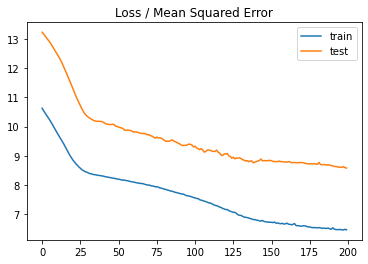

In [238]:
# DO NOT Modify
reg_model = Sequential()
reg_model.add(Dense(8, input_dim=8, activation='relu'))
reg_model.add(Dense(4, activation='relu'))
reg_model.add(Dense(1, activation='linear'))
reg_model.compile(loss='mae', 
                optimizer='SGD')


history = reg_model.fit(X_train, Y_train, 
                            validation_data=(X_test, Y_test), 
                            epochs=200, verbose=1)

train_mse = reg_model.evaluate(X_train, Y_train, verbose=0)
test_mse = reg_model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
y_preds=reg_model.predict(X_test)
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [239]:
r2_score(Y_test,y_preds)**0.5

nan

# Independent component analysis

In [114]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=8)
X_ica = ica.fit_transform(X)
X_ica = pd.DataFrame(data = X_ica)


In [115]:
X_ica.head()

,0,1,2,3,4,5,6,7
0,0.020283,-0.022781,0.017370,-0.038583,-0.108172,-0.041023,-0.093598,-0.011073
1,0.020285,-0.022597,0.017342,-0.038582,-0.108187,-0.040975,-0.093622,-0.011098
2,0.020289,-0.022290,0.017297,-0.038580,-0.108213,-0.040894,-0.093661,-0.011139
3,0.020303,-0.021062,0.017116,-0.038572,-0.108315,-0.040571,-0.093819,-0.011306
4,0.020330,-0.018608,0.016753,-0.038556,-0.108520,-0.039925,-0.094134,-0.011638


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_ica, Y, test_size=0.20, random_state=101)

Epoch 1/100
6/6 [==============================] - 1s 67ms/step - loss: 10.7883 - val_loss: 13.2048
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 10.3257 - val_loss: 12.7186
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 9.7685 - val_loss: 12.1164
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 9.3866 - val_loss: 11.5080
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 9.0628 - val_loss: 11.0104
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 8.7313 - val_loss: 10.6259
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 8.8943 - val_loss: 10.4057
Epoch 8/100
6/6 [==============================] - 0s 12ms/step - loss: 8.6909 - val_loss: 10.3392
Epoch 9/100
6/6 [==============================] - 0s 11ms/step - loss: 8.6909 - val_loss: 10.2952
Epoch 10/100
6/6 [==============================] - 0s 12ms/step - loss: 8.6639 - val_loss: 10.3796
Epoch 1

6/6 [==============================] - 0s 12ms/step - loss: 7.9438 - val_loss: 9.9268
Epoch 84/100
6/6 [==============================] - 0s 13ms/step - loss: 8.0385 - val_loss: 9.8188
Epoch 85/100
6/6 [==============================] - 0s 11ms/step - loss: 7.8875 - val_loss: 9.8163
Epoch 86/100
6/6 [==============================] - 0s 12ms/step - loss: 7.7502 - val_loss: 9.8048
Epoch 87/100
6/6 [==============================] - 0s 12ms/step - loss: 7.8159 - val_loss: 10.0285
Epoch 88/100
6/6 [==============================] - 0s 13ms/step - loss: 7.8535 - val_loss: 9.7909
Epoch 89/100
6/6 [==============================] - 0s 11ms/step - loss: 7.8312 - val_loss: 9.8070
Epoch 90/100
6/6 [==============================] - 0s 12ms/step - loss: 7.5826 - val_loss: 10.0192
Epoch 91/100
6/6 [==============================] - 0s 11ms/step - loss: 7.9866 - val_loss: 9.8414
Epoch 92/100
6/6 [==============================] - 0s 11ms/step - loss: 7.9026 - val_loss: 9.7480
Epoch 93/100
6/6 [===

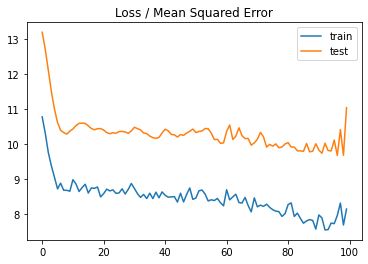

In [113]:
reg_model = Sequential()
a=reg_model.add(Dense(3, input_dim=4, activation=LeakyReLU(),kernel_initializer='he_uniform',kernel_regularizer='l2'))
reg_model.add(Dense(2, activation=LeakyReLU(),kernel_regularizer='l2'))
reg_model.add(Dropout(0.2))
reg_model.add(Dense(1, activation='linear',kernel_regularizer='l2'))
reg_model.compile(loss='mae', 
                optimizer=opt)


history = reg_model.fit(X_train, Y_train, 
                            validation_data=(X_test, Y_test), 
                            epochs=100, verbose=1)
y_pred=reg_model.predict(X_test)
train_mse = reg_model.evaluate(X_train, Y_train, verbose=0)
test_mse = reg_model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()